In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration
### Plot some images

In [2]:
# load our high-level extracted train set
with np.load("/Users/Ingo/Python Files/Course-project4/high-level-train-features.npz") as npz_file:
    hl_tr_features = npz_file["features"]
    tr_labels = npz_file["labels"]
    
print("train features shape:", hl_tr_features.shape)
print("train labels shape:", tr_labels.shape)

train features shape: (280, 1280)
train labels shape: (280,)


In [3]:
# load high-level validation set
with np.load("/Users/Ingo/Python Files/Course-project4/high-level-valid-features.npz") as npz_file:
    hl_val_features = npz_file["features"]
    val_labels = npz_file["labels"]
    
print("validation features shape:", hl_val_features.shape)
print("validation labels shape:", val_labels.shape)

validation features shape: (139, 1280)
validation labels shape: (139,)


In [4]:
# load high-level test set
with np.load("/Users/Ingo/Python Files/Course-project4/high-level-test-features.npz") as npz_file:
    hl_te_features = npz_file["features"]
    te_labels = npz_file["labels"]
    
print("test features shape:", hl_te_features.shape)
print("test labels shape:", te_labels.shape)

test features shape: (50, 1280)
test labels shape: (50,)


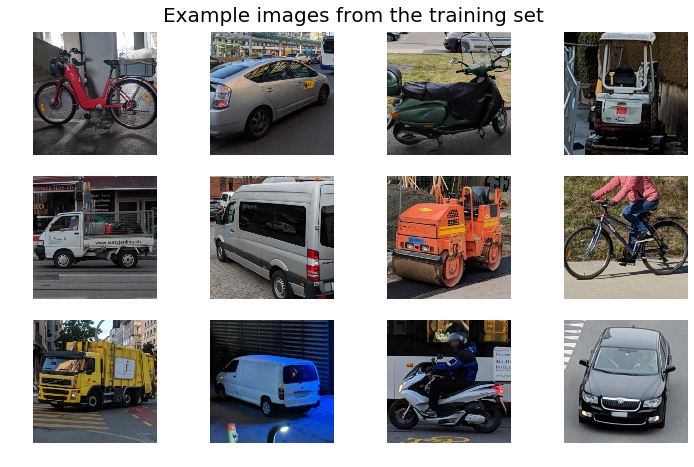

In [5]:
# get list of images to be plotted
to_be_plotted = ["/Users/Ingo/Python Files/Course-project4/swissroads/train/bike/bike-0022.png",
                "/Users/Ingo/Python Files/Course-project4/swissroads/train/car/car-0013.png",
                "/Users/Ingo/Python Files/Course-project4/swissroads/train/motorcycle/motorcycle-0004.png",
                "/Users/Ingo/Python Files/Course-project4/swissroads/train/other/other-0031.png",
                "/Users/Ingo/Python Files/Course-project4/swissroads/train/truck/truck-0037.png",
                "/Users/Ingo/Python Files/Course-project4/swissroads/train/van/van-0020.png",
                "/Users/Ingo/Python Files/Course-project4/swissroads/train/other/other-0002.png",
                "/Users/Ingo/Python Files/Course-project4/swissroads/train/bike/bike-0010.png",
                "/Users/Ingo/Python Files/Course-project4/swissroads/train/truck/truck-0015.png",
                "/Users/Ingo/Python Files/Course-project4/swissroads/train/van/van-0009.png",
                "/Users/Ingo/Python Files/Course-project4/swissroads/train/motorcycle/motorcycle-0035.png",
                "/Users/Ingo/Python Files/Course-project4/swissroads/train/car/car-0024.png",
                ]
# loop through list and plot images
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (10, 6))

for axis, directory in zip(axes.flatten(), to_be_plotted):
    img = Image.open(directory)
    axis.imshow(img)
    axis.axis("off")


plt.suptitle("Example images from the training set", size = 20, y = 1.05)
plt.tight_layout(pad = 0)
plt.show()

### Scree plot
To create an effective scree plot, we have to create a PCA model while not reducing the number of components. By not reducing the number, we can see how many components explain x% of the variance - up until 100%

In [6]:
from sklearn.decomposition import PCA

# create PCA object
pca = PCA(n_components = None) # don't reduce number of components

# fit on and transform the extracted training features
pca_transformed = pca.fit_transform(hl_tr_features) # not standardized as they are feature vectors of images
print("input matrix shape:", hl_tr_features.shape)
print("pca_transfomed shape:", pca_transformed.shape)
print("there are still 1280 components per data point, but the transformation shape is limited:",
     pca.components_.shape)

# sum of all explained variances of a model should be equal to 1
pca_sum = sum(pca.explained_variance_ratio_)
print("sum of all pca should be equal to 1 -- check: {:.3f}".format(pca_sum))
print("len pca.explained_variance_ratio_:", len(pca.explained_variance_ratio_))

input matrix shape: (280, 1280)
pca_transfomed shape: (280, 280)
there are still 1280 components per data point, but the transformation shape is limited: (280, 1280)
sum of all pca should be equal to 1 -- check: 1.000
len pca.explained_variance_ratio_: 280


Let's plot the results to see which components explain how much variance

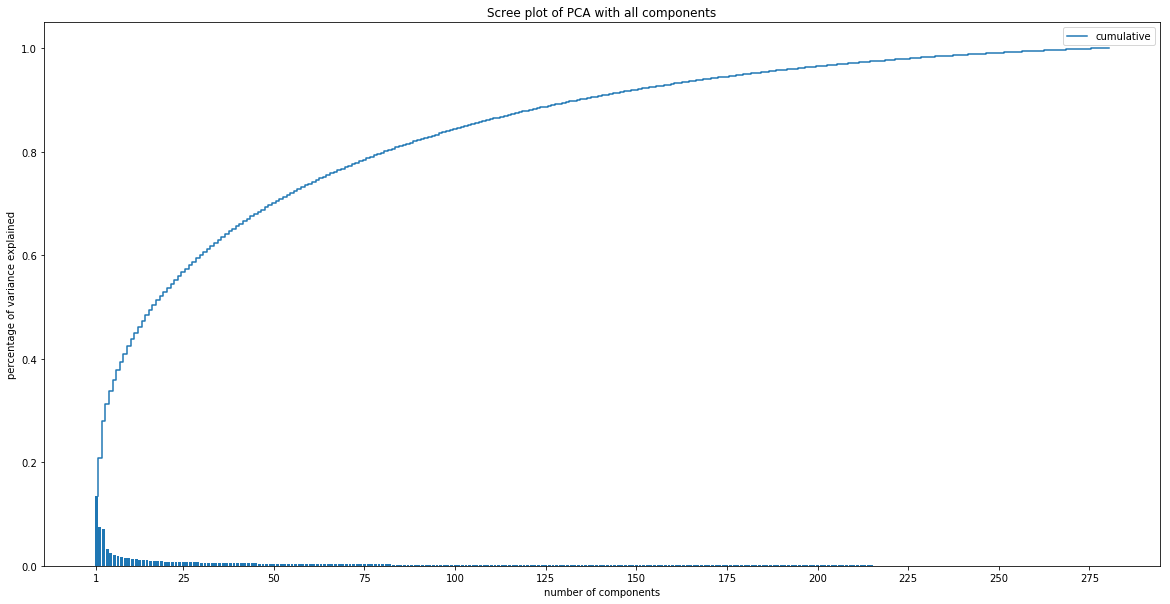

In [7]:
# get explained variance of the model in a separate variable
variance_explained = pca.explained_variance_ratio_


plt.figure(figsize = (20, 10))
# plot expalined variance as bar charts
# define x-coordinates
x_cor = np.arange(1, len(variance_explained) + 1) # start coordinates at 1 until len() + 1
plt.xticks([1, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275]) # let ticks start at 1

plt.bar(x_cor, variance_explained)

# add the cumulate variance explained
cum_var_explained = np.cumsum(variance_explained)
plt.step(x_cor + 0.5, cum_var_explained, label = "cumulative")

plt.legend()
plt.xlabel("number of components")
plt.ylabel("percentage of variance explained")
plt.title("Scree plot of PCA with all components")
plt.show()

As we can see here, to get to 100% variance explained, we need all 280 principal components. As a consequence, the graph is extremely spread out. 

The first ~25 components seem to explain around 50% of the variance, so let's plot them separately to get a clearer overview.

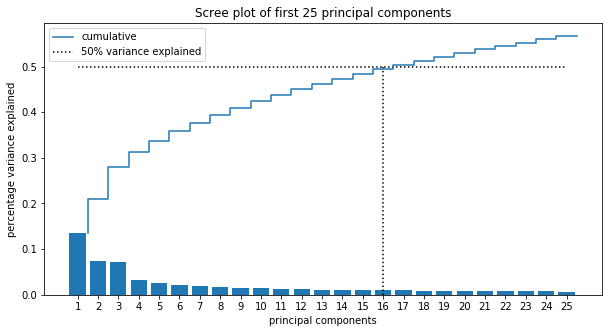

In [8]:
var_explained25 = variance_explained[:25]

plt.figure(figsize = (10, 5))
# get new xcors
x_cor25 = np.arange(1, len(var_explained25) + 1)
plt.xticks(x_cor25)

# plot the variance explained
plt.bar(x_cor25, var_explained25)

# get the cumulative variance explained
cum_var25 = np.cumsum(var_explained25)

# plot the steps
plt.step(x_cor25 + 0.5, cum_var25, label = "cumulative")

# plot horizontal line at 50% variance explained
plt.hlines(y = 0.5, xmin = 1, xmax = 25, color = "black", label = "50% variance explained",
          linestyles = "dotted")
plt.vlines(x = 16, ymin = 0, ymax = 0.5, color = "black", linestyles = "dotted")

plt.title("Scree plot of first 25 principal components")
plt.xlabel("principal components")
plt.ylabel("percentage variance explained")
plt.legend()
plt.show()

Here, we can see that the first 3 principal components explain around 27% the total variance, whereas the first 2 components already explain around 21% of the variance. 

The first 10 components seem to explain around 42% of the variance, while 50% of variance is explained with 16 principal components.

#### PCA with $n=2$ components
Now, we will reduce the dimensionality of the data onto a set of $n = 2$ orthogonal axes

In [9]:
# create object
pca2 = PCA(n_components = 2, random_state = 0)

# fit and transform the high-level training set feature vectors
X_2d = pca2.fit_transform(hl_tr_features) # no y variable as this is unsupervised learning

In [10]:
# present results with variance in a df
pca_results_df = pd.DataFrame({
    "variance": hl_tr_features.var(axis = 0),
    "component 1": pca2.components_[0],
    "component 2": pca2.components_[1]
})

pca_results_df.sort_values(by = "variance", ascending = False)[:10]

,variance,component 1,component 2
54,1.008391,0.122005,-0.097957
1094,0.898203,0.092074,-0.098862
1120,0.823358,0.024403,0.091000
183,0.793712,0.022158,-0.122920
1022,0.763500,-0.071905,-0.032540
279,0.743072,-0.010854,0.014103
148,0.742124,0.106024,-0.093588
898,0.725200,-0.007374,0.108356
799,0.720892,0.054377,0.028128
257,0.714833,-0.082085,0.012009


In this dataframe, we have the number of extracted high-level features as rows, and the 2 components as well as the variance as columns.

Component 1 explaines features 54 and 1094 well, while feature 1120 is well explained by component 2.

In [11]:
pca2.explained_variance_ratio_

array([0.13449366, 0.07425536], dtype=float32)

In total, our 2 component model above explaines around 21% of the variance - as we have seen in the scree plot.

Let's visualize the first 10 features in a 2d plot together with all classes

In [12]:
test_class = (tr_labels == 0)
if test_class[0] == 1:
    print("ok")

ok


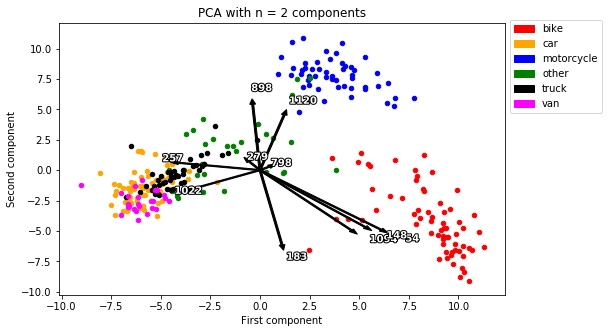

In [13]:
# import patches to create a custom artist for the legend
import matplotlib.patches as mp

# import path_effects for arrow effects
import matplotlib.patheffects as path_effects


plt.figure(figsize = (8, 5))

for lbl_class, clr, lbl in zip(range(6), # iterate through each of the one-hot-encoded columns
                         ["red", "orange", "blue", "green", "black", "magenta"], # assign each col a color
                         ["bike", "car", "motorcycle", "other", "truck", "van"]): # label the scatter plots

    # mark the relevant class label with boolean True
    label_class = (tr_labels == lbl_class)
    
    # iterate through each value by index number
    for ohe_index in range(280):
        # boolean True equals 1
        # find the values marked with "1", then we know that the value belongs to the desired class
        if label_class[ohe_index] == 1:
            # plot the corresponding value in X_2d using the ohe_index as index
            plt.scatter(x = X_2d[ohe_index, 0], # first component
                       y = X_2d[ohe_index, 1], # second component
                       s = 20,
                       color = clr)
            
for feature in [54, 1094, 1120, 183, 1022, 279, 148, 898, 798, 257]:
    # get weights
    weight1 = pca_results_df.loc[feature, "component 1"] * 50 # rescale them
    weight2 = pca_results_df.loc[feature, "component 2"] * 50 # 10 is arbitrary

    # plot arrows
    plt.arrow(
        0, 0, # vector starts at (x, y) = (0, 0)
        weight1, weight2, # ends at (x, y) = (weight1, weight2)
        color = "black", width = 0.1)

    # Add text
    text = plt.text(
        weight1 * 1.2, weight2 * 1.2, # x, y location, 1.2 is arbitrary
        feature, # feature name, i.e. 54, 1094, 1120, etc.
        weight = "bold", color = "white")

    # make text bigger
    text.set_path_effects([
        path_effects.Stroke(linewidth = 2, foreground = "black"),
        path_effects.Normal()])

# create custom patches for labels
red_patch = mp.Patch(color = "red", label = "bike")
orange_patch = mp.Patch(color = "orange", label = "car")
blue_patch = mp.Patch(color = "blue", label = "motorcycle")
green_patch = mp.Patch(color = "green", label = "other")
black_patch = mp.Patch(color = "black", label = "truck")
magenta_patch = mp.Patch(color = "magenta", label = "van")

plt.legend(handles = [red_patch, orange_patch, blue_patch, green_patch, black_patch, magenta_patch],
           bbox_to_anchor = (1, 1.03))            
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("PCA with n = 2 components")
plt.show()

#### Interpreting the results
It is impressive to see the clear differences among the groups, having lowered the informational value onto 2 principal components. The group with 2 wheels (bike and motorcycle) is on one side through which you could draw a liner line,  and all other vehicles (excluding `other` category) with 4 wheels form a separate group through which you could draw a linear line.

The `other` category is scattered around somewhere between - as there are e.g. busses, roadworking machinery but also scooter rollers in there. 

This plot (and the scree plot above) show that the extracted high-level features are increadibly valuable and bear a lot of informational value. The scree plot showed that the first two components are able to explain ~21% of the variance. On top of that, projecting the data onto $n = 2$ orthogonal axes, we are able to keep so much informational value - while also reducing the dimensionality to 2 - that we are able to distinctly split 2-wheel vehicles from 4-wheel vehicles as well as still being able to discriminate among motorized, non-motorized, and size and function of the vehicle. 

As the scree plot showed, 16 principal components are able to explain ~50% of the total variance, which is another accomplishment of the MobileNet V2 high-level feature extraction. The model is able to recognize the relevant high-level features so quickly from real-world images, it is able to hand us features that explain 50% variance with just 16 components.

However, it is important to note that the images are similar in many features, e.g. streets, color patterns, wheels, vehicle shapes, which might be an explanation why even as few as the first 2 principal components (in the case without limiting the model to $n = 2$ components) are able to explain ~21% of all variance. 